#  *sales prediction eda*

In [1]:
import pandas as pd             #imporitng libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('train.csv')       #import data
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# *1. variabe identification*

In [3]:
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

categorical data : 

1.Segment
2.country
3.city                  
4.state                   
5.region                   
6.category                   
7.sub category
8.ship mode

continuous data :

1.sales
2.Order date
3.Ship date

*rest all are discrete varaibles*



***the features with ID's are not required for eda so just drop the "ID" columns for sales data***

In [4]:
sales.columns = sales.columns.str.replace(' ', '_')    #adding "_" instead of " " for our convience

In [5]:
sales.drop(columns=['Order_ID','Row_ID','Customer_ID','Product_ID'],inplace=True)

In [6]:
sales

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Product_Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


now we can perform eda on the repective features

#  ***2. Univariate Analysis***


univariate analysis is usually done on categorical variables using countplot and continuous variable(sales) using distplot.

Before that we need to convert the date columns to yyyy-mm-dd format for easy plotting of date columns.

In [7]:
sales['Order_Date'] = pd.to_datetime(sales['Order_Date'])

In [8]:
sales['Ship_Date'] = pd.to_datetime(sales['Ship_Date'])

In [9]:
sales

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Product_Name,Sales
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


***for categorical variables :***

In [10]:
result1 = sales.groupby(["City"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False).head(20)
result2 = sales.groupby(["State"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False).head(20)

In [11]:
result1

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


In [12]:
result2

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


***top 20 cities and states dataframes are made as the countplot would be very confusing for large data.***

In [13]:
cols = ['Segment','Region','Category','Sub-Category','Ship_Mode']

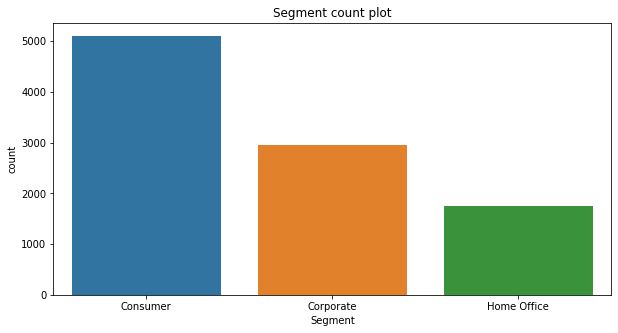

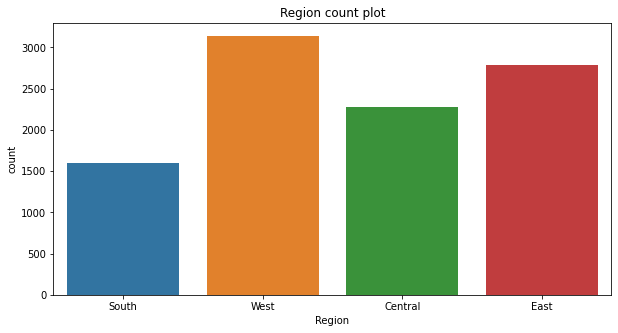

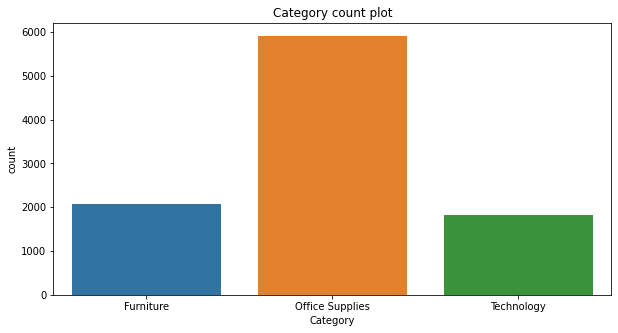

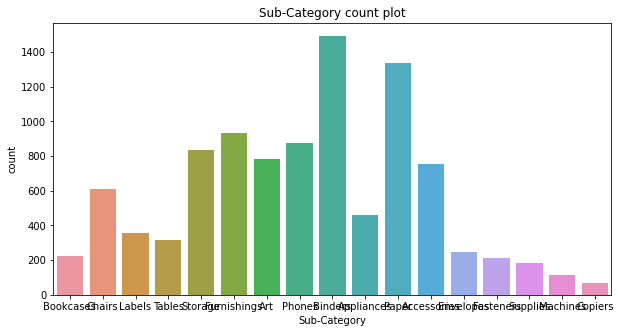

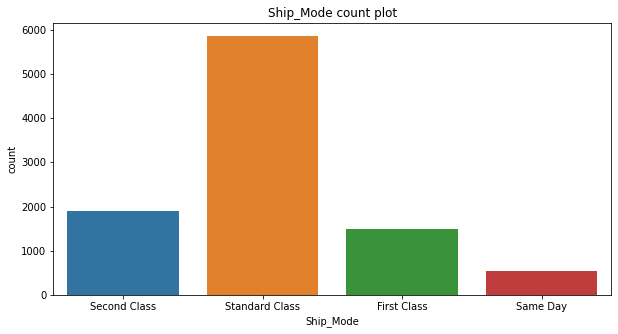

In [14]:
for i in cols:
    plt.figure(figsize=(10,5))
    plt.title(i+" count plot")
    sns.countplot(sales[i])
    plt.show()

***for continuous variable(sales) :***

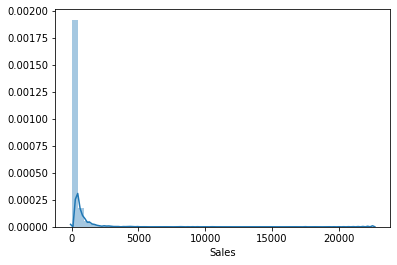

In [15]:
sns.distplot(sales["Sales"])

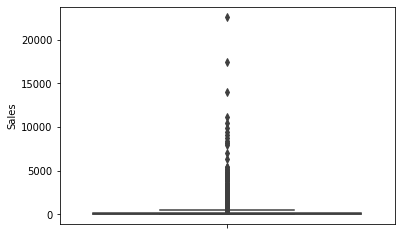

In [16]:
sns.boxplot(y='Sales',data=sales)

from the above distplot we can observe that sales are ***highly right skewed*** with so many outliers

# *3. bivariate analysis*

***categorical vs categorical :***

In [17]:
pd.crosstab(sales['Sub-Category'],sales['Category'])

Category,Furniture,Office Supplies,Technology
Sub-Category,,,
Accessories,0,0,756
Appliances,0,459,0
Art,0,785,0
Binders,0,1492,0
Bookcases,226,0,0
Chairs,607,0,0
Copiers,0,0,66
Envelopes,0,248,0
Fasteners,0,214,0


[]

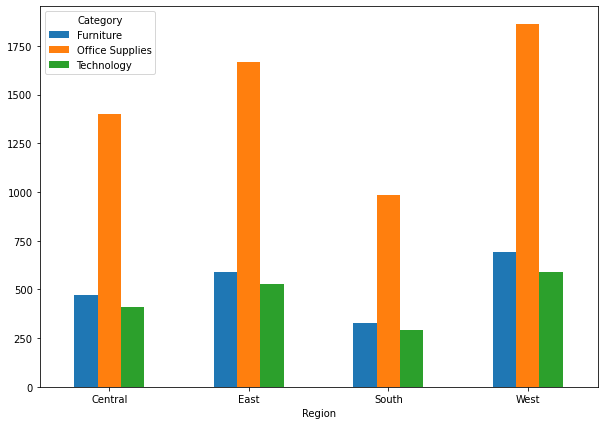

In [18]:
pd.crosstab( sales['Region'],sales['Category']).plot(kind='bar',stacked=False, figsize=(10,7))
plt.xticks(rotation=0)
plt.plot()

it is very clear that in all the regions office supplies are sold more

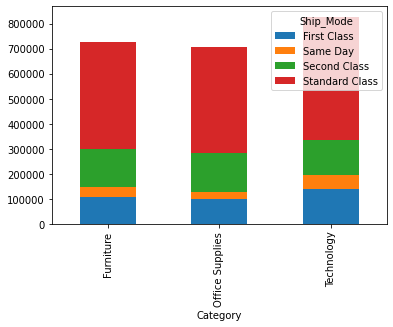

In [19]:
pd.crosstab(index=sales["Category"],columns=sales["Ship_Mode"],values=sales["Sales"],aggfunc="sum").plot(kind="bar",stacked=True)

in all the segments customers prefer standard class shipment mode but significantly in technology sector same day shipment mode is high that other sectors.

***categorical vs continuous :***

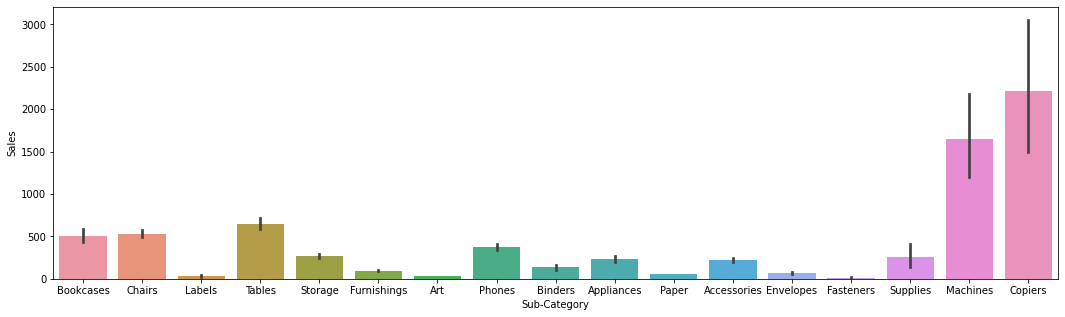

In [20]:
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.barplot("Sub-Category","Sales",data=sales)

1.From the above graph we can observe that sales are very high in copiers, machines sub-categories

2.And literally people are not interested to buy products from fasteners, paper, art,labels, furnishings, envelpoes categories, so better to stop these categry sales and concentrate on increasing categories.

***top 20 products :***

In [21]:
topprods=pd.DataFrame(sales.groupby('Product_Name').sum()['Sales'])
topprods.sort_values(by=['Sales'], inplace=True, ascending=False)

In [22]:
top20=topprods.head(20)

In [23]:
top20

,Sales
Product_Name,
Canon imageCLASS 2200 Advanced Copier,61599.8240
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.3840
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800
HON 5400 Series Task Chairs for Big and Tall,21870.5760
GBC DocuBind TL300 Electric Binding System,19823.4790
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
Hewlett Packard LaserJet 3310 Copier,18839.6860
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.8950
GBC DocuBind P400 Electric Binding System,17965.0680


***continuous vs continuous :***

in this part of analysis we only deal with dates as per the data so different insights we could draw from the dates are :

1.overall sales trend

2.Month over Month (MoM) growth

3.Year over Year (YoY) growth

***overall sales trend :***

In [24]:
sales['Month_Year']=sales['Order_Date'].apply(lambda x:x.strftime('%Y-%m'))
sales

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Product_Name,Sales,Month_Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05
9796,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-12
9797,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,2016-12
9798,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-12


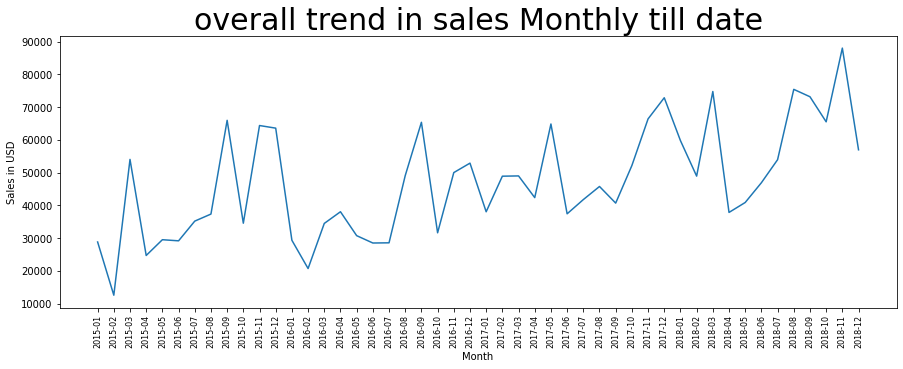

In [25]:
ovrsls = sales.groupby('Month_Year').sum()
months = [month for month, sales in sales.groupby('Month_Year')]
plt.figure(figsize=(15,5))
plt.plot(months,ovrsls['Sales'])
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title('overall trend in sales Monthly till date',fontsize=30)
plt.show()

***Month over Month growth :***

In [26]:
MoM=pd.DataFrame(ovrsls['Sales'])

In [27]:
MoM['Last_Month']=np.roll(MoM['Sales'],1)
MoM=MoM.drop(MoM.index[0])   #drop the first index as we dont know the previous sales

In [28]:
MoM['Growth']=(MoM['Sales']/MoM['Last_Month'])-1
MoM.head()           #calculating growth using current and previous month sales

,Sales,Last_Month,Growth
Month_Year,,,
2015-02,12588.4840,28828.254,-0.563328
2015-03,54027.6920,12588.484,3.291835
2015-04,24710.0160,54027.692,-0.542642
2015-05,29520.4900,24710.016,0.194677
2015-06,29181.3346,29520.490,-0.011489


In [29]:
MoMsls = MoM.drop(columns = ["Sales", "Last_Month"])
MoMsls['Months'] =MoMsls.index
MoMsls.reset_index(drop=True, inplace=True)
MoMsls.head()             #dataframe of every month and its growth.

,Growth,Months
0,-0.563328,2015-02
1,3.291835,2015-03
2,-0.542642,2015-04
3,0.194677,2015-05
4,-0.011489,2015-06


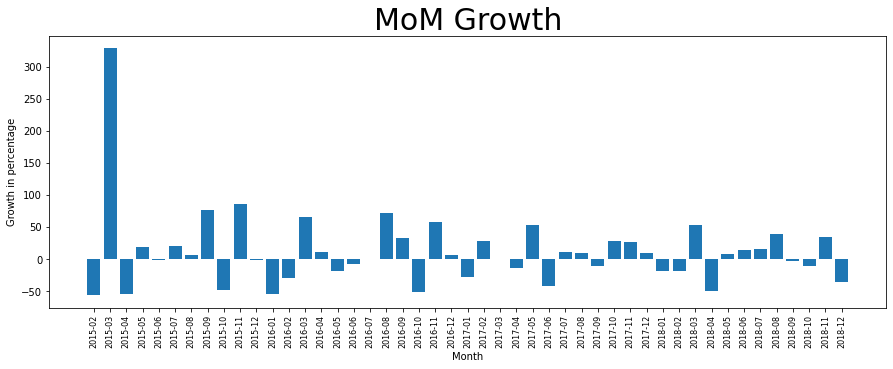

In [30]:
plt.figure(figsize=(15,5))
plt.bar(MoMsls['Months'],MoMsls['Growth']*100)  #percentage of growth.
plt.xticks(MoMsls['Months'], rotation='vertical', size = 8)
plt.ylabel('Growth in percentage')
plt.xlabel('Month')
plt.title("MoM Growth",fontsize=30)
plt.show()

***Year over Year growth :***

In [31]:
YoY = pd.DataFrame(sales.groupby('Month_Year').sum()['Sales'])
YoY['Last_Year'] = np.roll(YoY['Sales'],12)

In [32]:
YoY = YoY.drop(YoY.index[0:12])   #drop 2015 sales as we dont know pervious year sales
YoY['Growth'] = (YoY['Sales']/YoY['Last_Year'])-1
YoY.head()

,Sales,Last_Year,Growth
Month_Year,,,
2016-01,29347.3864,28828.254,0.018008
2016-02,20728.3520,12588.484,0.646612
2016-03,34489.6776,54027.692,-0.361630
2016-04,38056.9685,24710.016,0.540143
2016-05,30761.5585,29520.490,0.042041


In [33]:
YoYsls = YoY.drop(columns = ["Sales", "Last_Year"])
YoYsls['Month_Year'] = YoYsls.index
YoYsls.reset_index(drop=True, inplace=True)
YoYsls.head()

,Growth,Month_Year
0,0.018008,2016-01
1,0.646612,2016-02
2,-0.361630,2016-03
3,0.540143,2016-04
4,0.042041,2016-05


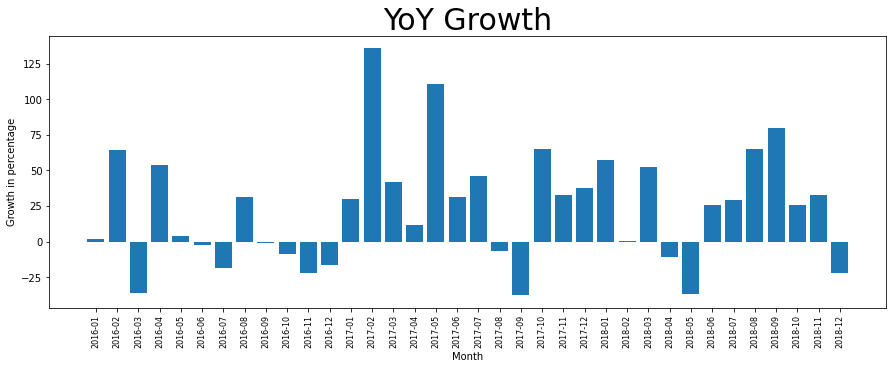

In [34]:
plt.figure(figsize=(15,5))
plt.bar(YoYsls['Month_Year'],YoYsls['Growth']*100)
plt.xticks(YoYsls['Month_Year'], rotation='vertical', size = 8)
plt.ylabel('Growth in percentage')
plt.xlabel('Month')
plt.title("YoY Growth", fontsize=30)
plt.show()

In [35]:
sales

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Product_Name,Sales,Month_Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05
9796,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-12
9797,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,2016-12
9798,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-12


# ***4. missing values treatment and visualizing time series data***

***drop the missing values***

In [36]:
sales.isnull().sum()    #only 11 missing values in postal code so just drop the rows with dropna()

Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
Month_Year        0
dtype: int64

In [37]:
sales.dropna(inplace=True)

In [38]:
sales

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Product_Name,Sales,Month_Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05
9796,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-12
9797,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,2016-12
9798,2016-12-01,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-12


***visualize time series plots according to category feature***

In [39]:
furniture = sales.loc[sales['Category'] == 'Furniture']
officesup = sales.loc[sales['Category'] == 'Office Supplies']
tech = sales.loc[sales['Category'] == 'Technology']

In [40]:
print(furniture['Order_Date'].min(), furniture['Order_Date'].max())
print(officesup['Order_Date'].min(), officesup['Order_Date'].max())
print(tech['Order_Date'].min(), tech['Order_Date'].max())

2015-01-03 00:00:00 2018-12-30 00:00:00
2015-01-03 00:00:00 2018-12-30 00:00:00
2015-01-02 00:00:00 2018-12-30 00:00:00


In [41]:
furniture = furniture.groupby('Order_Date')['Sales'].sum().reset_index()
officesup = officesup.groupby('Order_Date')['Sales'].sum().reset_index()
tech = tech.groupby('Order_Date')['Sales'].sum().reset_index()

In [42]:
furniture = furniture.set_index('Order_Date')
furniture.index

DatetimeIndex(['2015-01-03', '2015-01-06', '2015-01-08', '2015-01-11',
               '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-16',
               '2015-01-19', '2015-01-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order_Date', length=877, freq=None)

In [43]:
officesup = officesup.set_index('Order_Date')
officesup.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order_Date', length=1142, freq=None)

In [44]:
tech = tech.set_index('Order_Date')
tech.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-06', '2015-01-07',
               '2015-01-09', '2015-01-11', '2015-01-12', '2015-01-13',
               '2015-01-15', '2015-01-16',
               ...
               '2018-12-18', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order_Date', length=817, freq=None)

from all the 3 categories office supplies has more orders.

In [45]:
furn = furniture['Sales'].resample('MS').mean()
offi = officesup['Sales'].resample('MS').mean()
tec = tech['Sales'].resample('MS').mean()

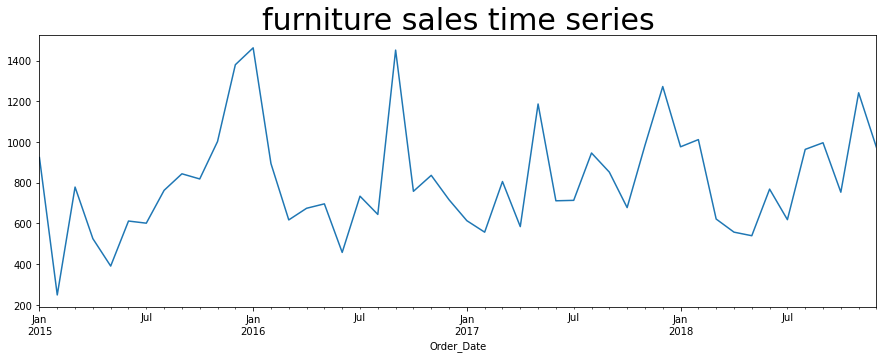

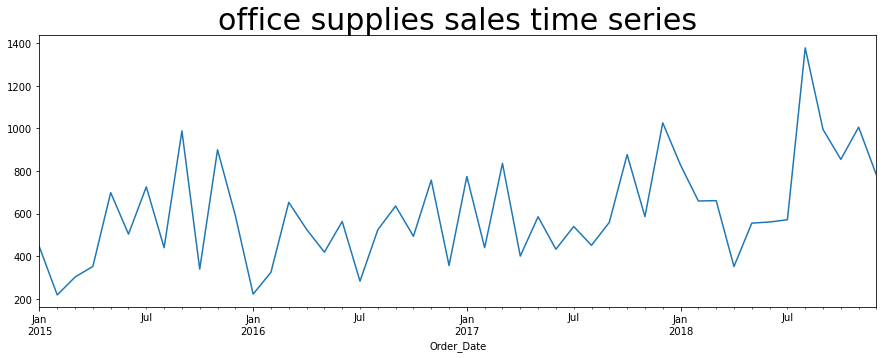

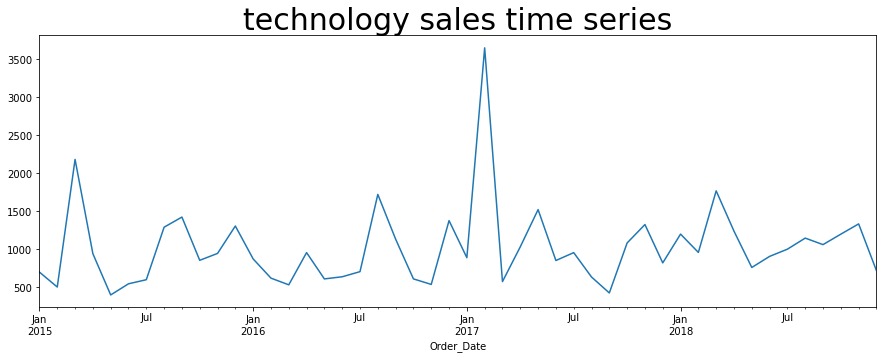

In [46]:
furn.plot(figsize=(15, 5))
plt.title('furniture sales time series',fontsize=30)
plt.show()
offi.plot(figsize=(15, 5))
plt.title('office supplies sales time series',fontsize=30)
plt.show()
tec.plot(figsize=(15, 5))
plt.title('technology sales time series',fontsize=30)
plt.show()

In [47]:
import statsmodels.api as sm

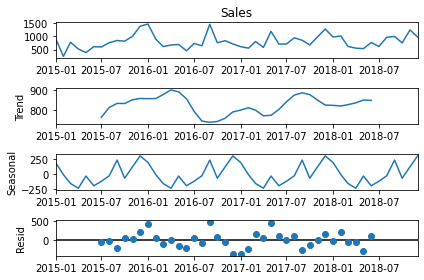

In [48]:
from pylab import rcParams

furndecomp = sm.tsa.seasonal_decompose(furn, model='additive')
fig = furndecomp.plot()

plt.show()

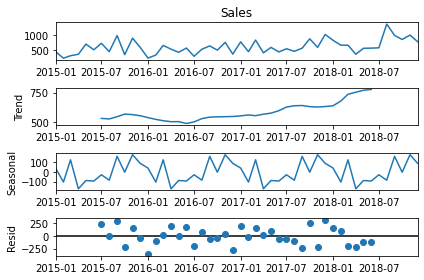

In [49]:
offidecomp = sm.tsa.seasonal_decompose(offi, model='additive')
fig = offidecomp.plot()

plt.show()

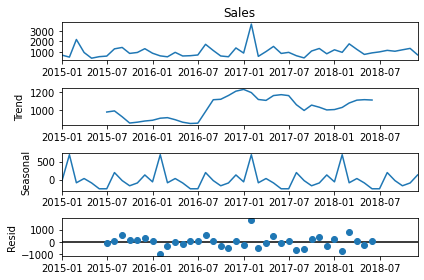

In [50]:
tecdecomp = sm.tsa.seasonal_decompose(tec, model='additive')
fig = tecdecomp.plot()

plt.show()

In [51]:
df = pd.DataFrame(columns=['date','sales'])

In [52]:
df.date = sales.Order_Date
df.sales = sales.Sales

In [53]:
df

,date,sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-12-01,10.3680
9797,2016-12-01,235.1880
9798,2016-12-01,26.3760


In [55]:
df.to_csv("date_sales.csv",index=False)